In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import glob
import os


import missingno as miss
import holidays
import datetime as dt
from holidays import country_holidays
import statsmodels.tsa.api as tsa
SEED = 321
np.random.seed(SEED)
pd.set_option('display.max_columns', 100)
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
sns.set_context("talk", font_scale=0.9)

In [3]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    ax.set_xticklabel_format(style = 'plain')
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [24]:
import seaborn as sns
with sns.plotting_context('poster'):    
    fig,ax = plot_dates(ts,xtick_fontsize=None,xtick_fontweight=None,title="Context=Poster")

NameError: name 'plot_dates' is not defined

In [4]:
path = r"C:/Users/dell/Documents/Data Enrichment assignments/Project-Part-4/Data/Chicago"
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [5]:
holidays= pd.read_csv("C:/Users/dell/Downloads/Holidays-Chicago - Holidays-Chicago (1).csv", low_memory = False)
crime_df = df
#crime_df.info()
crime_df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,41.78,-87.61
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68
2,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70
3,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.00,NaN,41.82,-87.62
4,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,41.91,-87.67


# Stakeholder Questions

1. Crimes Across the Years:
 - Is the total number of crimes increasing or decreasing across the years?
 
 - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
 
 
 2. Comparing AM vs. PM Rush Hour:
- Are crimes more common during AM rush hour or PM rush hour?
         - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
         
       - You can consider any crime that occurred between 4 -7 PM as PM rush hour. 
        
 - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
 
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
        
3. Comparing Months:

- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

4. Comparing Holidays:

- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?

In [6]:
#Question 1
crime_df['DateTime'] = pd.to_datetime(crime_df['Date'],format = '%m/%d/%Y %H:%M:%S %p')                                   


In [7]:
crime_df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10580
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 87559
Longitude                87559
DateTime                     0
dtype: int64

In [15]:
crime_df['year'] = crime_df['DateTime'].dt.year
crime_df['month'] = crime_df['DateTime'].dt.month_name()
crime_df['day of month'] = crime_df['DateTime'].dt.day
crime_df['day of week'] = crime_df['DateTime'].dt.day_name()
crime_df['hour'] = crime_df['DateTime'].dt.hour
crime_df['minutes'] = crime_df['DateTime'].dt.minute
crime_df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,DateTime,year,month,day of month,day of week,hour,minutes
0,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,41.78,-87.61,2001-01-01 01:00:00,2001,January,1,Monday,1,0
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68,2001-01-01 01:00:00,2001,January,1,Monday,1,0
2,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70,2001-01-01 01:00:00,2001,January,1,Monday,1,0
3,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.00,NaN,41.82,-87.62,2001-01-01 01:00:00,2001,January,1,Monday,1,0
4,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,41.91,-87.67,2001-01-01 01:00:00,2001,January,1,Monday,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7815538,13094350,06/03/2023 12:53:00 AM,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,1122,11.00,27.00,41.89,-87.72,2023-06-03 12:53:00,2023,June,3,Saturday,12,53
7815539,13098974,06/03/2023 12:55:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1133,11.00,24.00,41.87,-87.71,2023-06-03 12:55:00,2023,June,3,Saturday,12,55
7815540,13094272,06/03/2023 12:55:00 AM,BATTERY,SIMPLE,RESTAURANT,True,False,221,2.00,4.00,41.81,-87.61,2023-06-03 12:55:00,2023,June,3,Saturday,12,55
7815541,13094820,06/03/2023 12:58:00 PM,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,2223,22.00,21.00,41.72,-87.64,2023-06-03 12:58:00,2023,June,3,Saturday,12,58


In [13]:
crime_df['hour'].value_counts()

12    895181
9     763016
10    749596
8     703021
11    694721
1     618693
7     618690
2     602938
3     585089
6     552366
4     523265
5     508967
Name: hour, dtype: int64

In [16]:
crime_df= crime_df.set_index('DateTime')


In [18]:
crime_df= crime_df.sort_index()

In [19]:
crime_df.info()
crime_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7815543 entries, 2001-01-01 01:00:00 to 2023-06-03 12:59:00
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
 12  year                  int64  
 13  month                 object 
 14  day of month          int64  
 15  day of week           object 
 16  hour                  int64  
 17  minutes               int64  
dtypes: bool(2), float64(4), int64(6), object(6)
memory usage: 1.0+ GB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month,day of month,day of week,hour,minutes
DateTime,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.00,NaN,41.78,-87.61,2001,January,1,Monday,1,0
2001-01-01 01:00:00,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.00,NaN,41.78,-87.68,2001,January,1,Monday,1,0
2001-01-01 01:00:00,6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.00,15.00,41.77,-87.70,2001,January,1,Monday,1,0
2001-01-01 01:00:00,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.00,NaN,41.82,-87.62,2001,January,1,Monday,1,0
2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.00,NaN,41.91,-87.67,2001,January,1,Monday,1,0


In [20]:
crime_df= crime_df.drop(columns=['ID','Location Description','Arrest','Domestic', 'Beat','Ward','Latitude','Longitude'])
crime_df.head()

,Date,Primary Type,Description,District,year,month,day of month,day of week,hour,minutes
DateTime,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,3.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,8.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,8.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,2.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,14.00,2001,January,1,Monday,1,0


In [31]:
type_df = crime_df.groupby('Primary Type').resample('D').sum().copy()

C:\Users\dell\AppData\Local\Temp\ipykernel_1996\4227763573.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_df = crime_df.groupby('Primary Type').resample('D').sum().copy()


In [32]:
type_df.head()

District  year  day of month  hour  minutes
Primary Type DateTime                                               
ARSON        2001-01-03     12.00  2001             3    10       29
             2001-01-04      2.00  2001             4     6       30
             2001-01-05     27.00  6003            15    11      117
             2001-01-06     35.00  8004            24    23       57
             2001-01-07      0.00     0             0     0        0

In [48]:
year_df.head()

DateTime
2001-01-01 01:00:00    2001
2001-01-01 01:00:00    2001
2001-01-01 01:00:00    2001
2001-01-01 01:00:00    2001
2001-01-01 01:00:00    2001
Name: year, dtype: int64

In [46]:
year_counts = year_df.value_counts().sort_index()

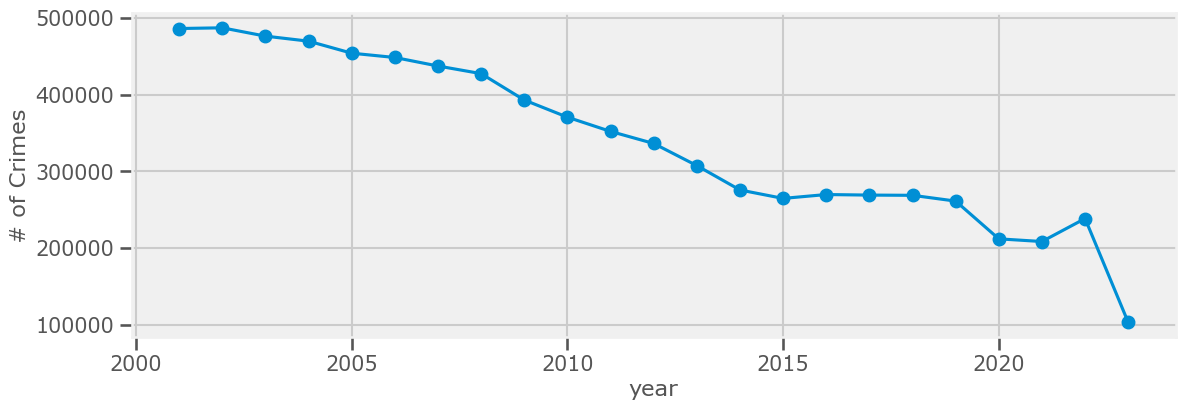

In [47]:
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='year');

### the total number of crimes has been decreasing over the years and on a downward trend. 

In [64]:
ind_crimes= crime_df.groupby('Primary Type',as_index = False)['year'].value_counts().sort_index()
ind_crimes

,Primary Type,year,count
0,ARSON,2002,1032
1,ARSON,2001,1011
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2006,726
...,...,...,...
715,WEAPONS VIOLATION,2007,3554
716,WEAPONS VIOLATION,2016,3450
717,WEAPONS VIOLATION,2015,3364
718,WEAPONS VIOLATION,2013,3245


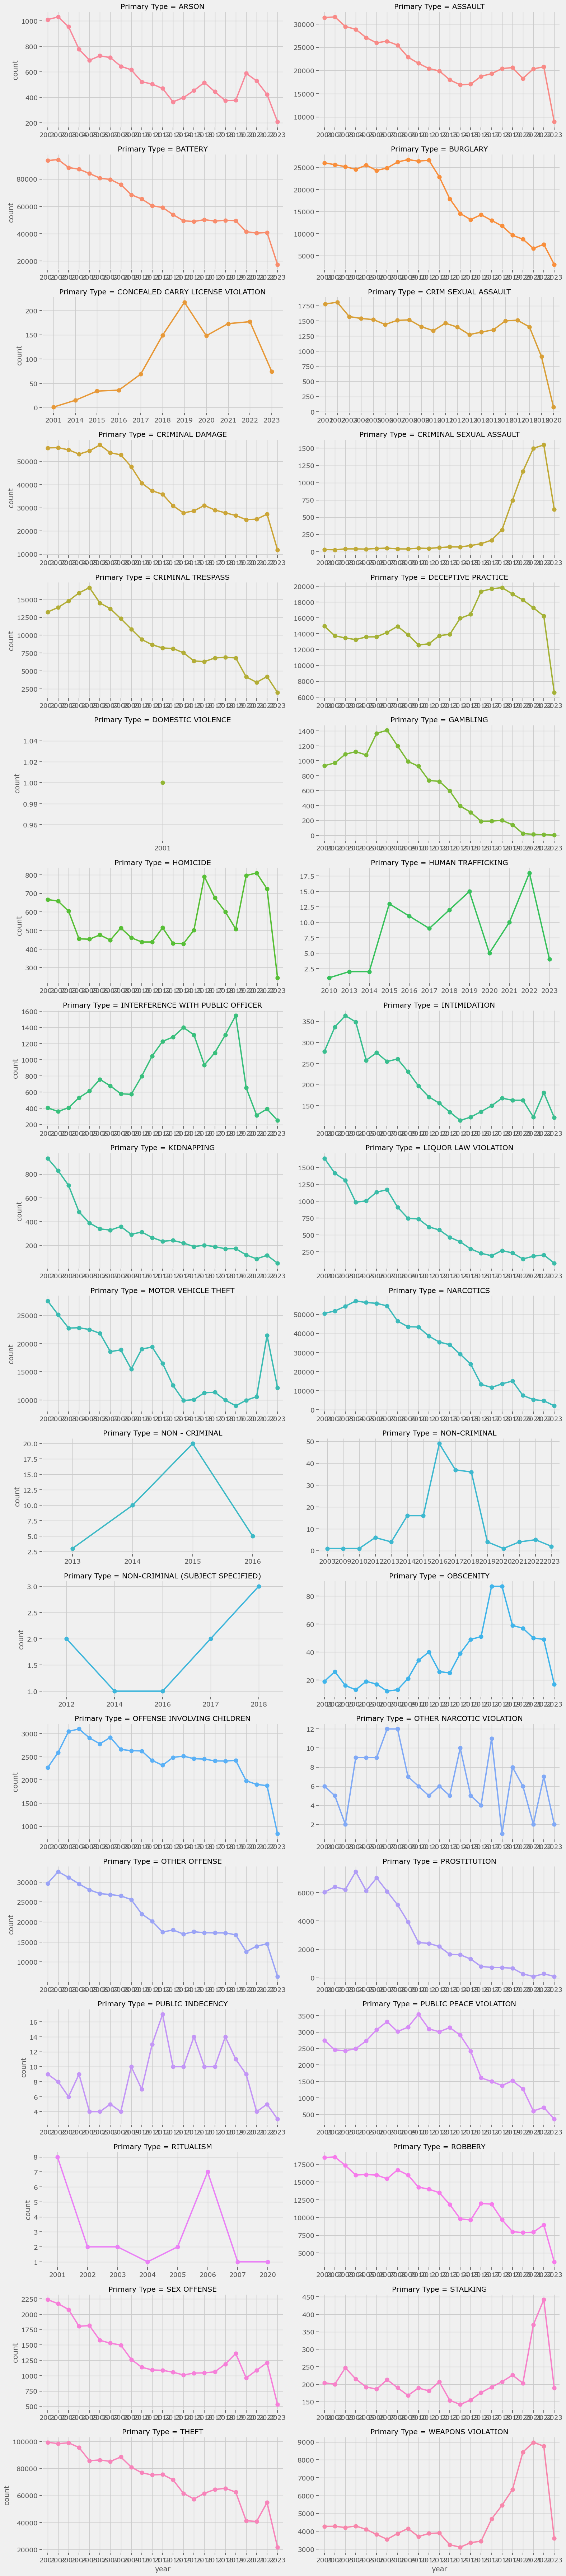

In [98]:
g = sns.catplot(data=ind_crimes, x='year', y='count',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)

[ax.grid(axis='x') for ax in g.axes];

### All the crimes seem to have followed the same trend of decreasing, sexual assault did have a 'jump' when overall crime was low but its in relation to the data, the actual total numbers were very low and didnt have much impact on the trend of overall crime in the city. 

In [76]:
crime_df.head()

,Date,Primary Type,Description,District,year,month,day of month,day of week,hour,minutes
DateTime,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,3.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,8.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,8.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,2.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,14.00,2001,January,1,Monday,1,0


In [78]:
crime_df['District'].value_counts()

8.00     525118
11.00    501419
6.00     457068
7.00     451737
25.00    444649
4.00     443694
3.00     396353
12.00    387446
9.00     381762
2.00     370060
19.00    350891
18.00    350794
5.00     346308
10.00    336716
15.00    334803
1.00     316246
14.00    302354
16.00    261674
22.00    256166
24.00    236144
17.00    225592
20.00    138255
31.00       243
21.00         4
Name: District, dtype: int64

In [81]:
district_df= crime_df.groupby('District',as_index = False).value_counts().sort_index().copy()
district_df

,District,Date,Primary Type,Description,year,month,day of month,day of week,hour,minutes,count
0,1.00,07/13/2006 08:43:00 AM,NARCOTICS,ATTEMPT POSSESSION NARCOTICS,2006,July,13,Thursday,8,43,23
1,1.00,10/16/2006 06:28:00 AM,NARCOTICS,ATTEMPT POSSESSION NARCOTICS,2006,October,16,Monday,6,28,23
2,1.00,08/03/2006 10:27:10 AM,NARCOTICS,ATTEMPT POSSESSION NARCOTICS,2006,August,3,Thursday,10,27,20
3,1.00,08/28/2006 07:30:00 AM,NARCOTICS,ATTEMPT POSSESSION NARCOTICS,2006,August,28,Monday,7,30,19
4,1.00,06/12/2006 10:15:00 PM,NARCOTICS,ATTEMPT POSSESSION NARCOTICS,2006,June,12,Monday,10,15,19
...,...,...,...,...,...,...,...,...,...,...,...
7680230,31.00,01/03/2020 11:10:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,2020,January,3,Friday,11,10,1
7680231,31.00,01/03/2009 12:20:00 PM,NARCOTICS,MANU/DELIVER:CRACK,2009,January,3,Saturday,12,20,1
7680232,31.00,01/02/2008 02:12:00 PM,NARCOTICS,MANU/DELIVER:CRACK,2008,January,2,Wednesday,2,12,1
7680233,31.00,01/01/2018 12:01:00 AM,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,2018,January,1,Monday,12,1,1


In [93]:
district = district_df.groupby('District')['count'].sum().sort_values()
district

District
21.00         4
31.00       243
20.00    138255
17.00    225592
24.00    236144
22.00    256166
16.00    261674
14.00    302354
1.00     316246
15.00    334803
10.00    336716
5.00     346308
18.00    350794
19.00    350891
2.00     370060
9.00     381762
12.00    387446
3.00     396353
4.00     443694
25.00    444649
7.00     451737
6.00     457068
11.00    501419
8.00     525118
Name: count, dtype: int64

In [95]:
district.idxmax()


8.0

In [96]:
district.idxmin()


21.0

In [105]:
num = district_df['count'].sum()
num

7815496

###  the district with the most crimes is district 8 the district with the least crimes is district 21.0

C:\Users\dell\AppData\Local\Temp\ipykernel_1996\59370427.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=district_df,x = 'District', y = 'count', order = district.index, ci = None)


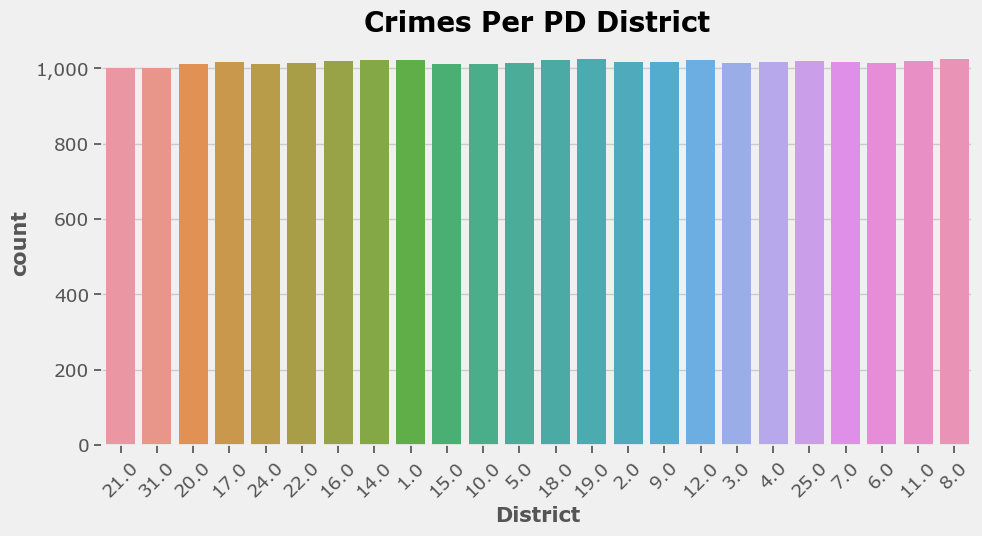

In [125]:
fig, ax = plt.subplots(figsize=(10,5))
def thousands(y, pos):
    'to format crimes into thousands'
    formatted= y*1000
    return f'{formatted:,.0f}' 
formatter = FuncFormatter(thousands)
ax = sns.barplot(data=district_df,x = 'District', y = 'count', order = district.index, ci = None)
plt.xticks(rotation = 45)
ax.set_title('Crimes Per PD District', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('District', fontsize = 15, fontweight = 'bold')
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('count', fontsize = 15, fontweight = 'bold');

In [126]:
# question 3
crime_df.head()

,Date,Primary Type,Description,District,year,month,day of month,day of week,hour,minutes
DateTime,,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,3.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,8.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,8.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,2.00,2001,January,1,Monday,1,0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,14.00,2001,January,1,Monday,1,0


In [127]:
cm= crime_df.resample('M').size().loc['2001':]
cm

DateTime
2001-01-31    38120
2001-02-28    33786
2001-03-31    40566
2001-04-30    40091
2001-05-31    41839
              ...  
2023-02-28    18228
2023-03-31    20445
2023-04-30    20325
2023-05-31    21397
2023-06-30     2152
Freq: M, Length: 270, dtype: int64

In [128]:
most_crime_month= cm.idxmax()
most_crime_month

Timestamp('2002-07-31 00:00:00', freq='M')

In [129]:
cm.loc[most_crime_month]

46013

In [130]:
least_crime_month= cm.idxmin()
least_crime_month

Timestamp('2023-06-30 00:00:00', freq='M')

In [131]:
cm.loc[least_crime_month]

2152

46013

In [132]:
crime_df['Primary Type'].value_counts()

THEFT                                1648730
BATTERY                              1428423
CRIMINAL DAMAGE                       890787
NARCOTICS                             748218
ASSAULT                               510048
OTHER OFFENSE                         485371
BURGLARY                              425276
MOTOR VEHICLE THEFT                   378765
DECEPTIVE PRACTICE                    347095
ROBBERY                               293416
CRIMINAL TRESPASS                     214856
WEAPONS VIOLATION                     107509
PROSTITUTION                           69851
OFFENSE INVOLVING CHILDREN             56003
PUBLIC PEACE VIOLATION                 52438
SEX OFFENSE                            30856
CRIM SEXUAL ASSAULT                    27615
INTERFERENCE WITH PUBLIC OFFICER       18455
LIQUOR LAW VIOLATION                   14927
GAMBLING                               14619
ARSON                                  13329
HOMICIDE                               12639
KIDNAPPING

In [134]:
trend= crime_df.groupby('Primary Type',as_index = False).value_counts().sort_index().copy()
trend

,Primary Type,Date,Description,District,year,month,day of month,day of week,hour,minutes,count
0,ARSON,10/19/2010 01:00:00 AM,BY FIRE,19.00,2010,October,19,Tuesday,1,0,5
1,ARSON,05/28/2014 05:05:00 AM,BY FIRE,7.00,2014,May,28,Wednesday,5,5,3
2,ARSON,03/15/2021 03:04:00 AM,BY FIRE,11.00,2021,March,15,Monday,3,4,3
3,ARSON,06/10/2014 04:13:00 AM,BY FIRE,19.00,2014,June,10,Tuesday,4,13,3
4,ARSON,09/18/2016 07:45:00 AM,BY FIRE,9.00,2016,September,18,Sunday,7,45,2
...,...,...,...,...,...,...,...,...,...,...,...
7680230,WEAPONS VIOLATION,04/12/2006 05:10:00 PM,UNLAWFUL USE OTHER DANG WEAPON,15.00,2006,April,12,Wednesday,5,10,1
7680231,WEAPONS VIOLATION,04/12/2006 03:46:13 AM,UNLAWFUL POSS OF HANDGUN,11.00,2006,April,12,Wednesday,3,46,1
7680232,WEAPONS VIOLATION,04/12/2006 03:15:00 PM,UNLAWFUL POSS OF HANDGUN,15.00,2006,April,12,Wednesday,3,15,1
7680233,WEAPONS VIOLATION,04/12/2005 12:55:00 AM,UNLAWFUL POSS OF HANDGUN,11.00,2005,April,12,Tuesday,12,55,1


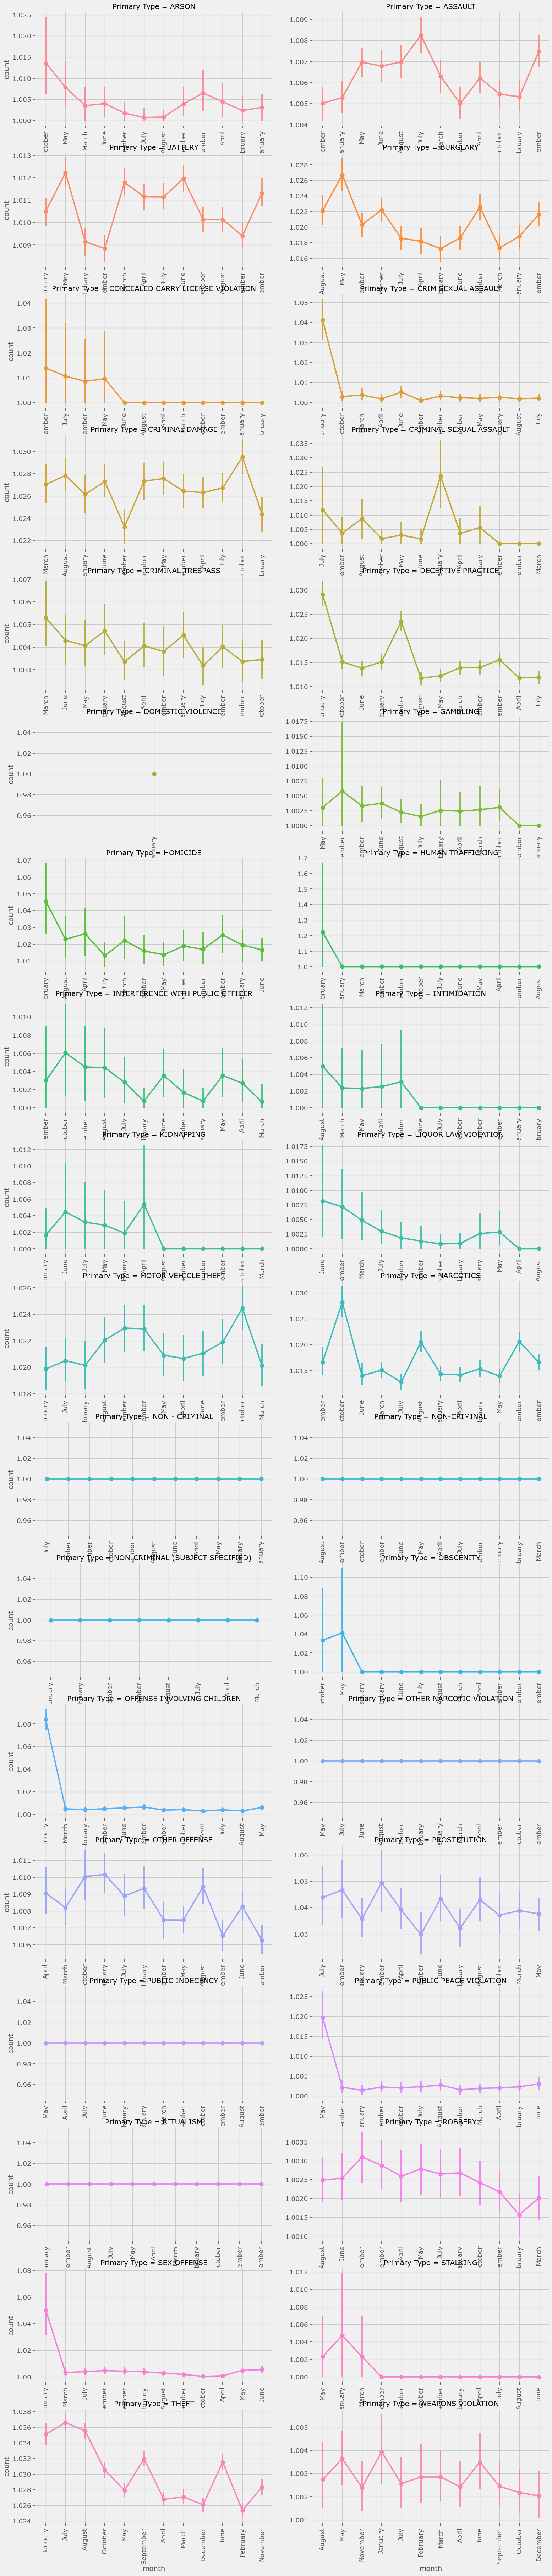

In [150]:
g = sns.catplot(data=trend, x='month', y='count',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
g.set_xticklabels(rotation = 90)
[ax.grid(axis='x') for ax in g.axes];
 

### the crimees that match the most crimes are assault, lq law violation, theft

#### narcotics dipped in june, intimidation and criminal sexual assault

#### all the other crimes seem to have a mind of their own, but some crimes are just more rare and their graphs were flat since there was no activity over several months. 